In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pyBedGraph import BedGraph
from pybedtools import BedTool
import scipy.stats

In [2]:
def read_list2(directory, file_name):
    with open(directory + file_name) as f:
        comp_dict = {}
        for line in f:
            tmp = line.strip().split("\t")
            #print(tmp)
            if tmp[0] != "crID":
                crid = tmp[0]
                mtid = tmp[2]
                if crid in comp_dict.keys():
                    comp_dict[crid].append([int(tmp[1]), mtid, int(tmp[3])])
                else:
                    comp_dict[crid] = [[int(tmp[1]), mtid, int(tmp[3])]]
    return comp_dict

In [3]:
def read_list3(directory, file_name, comp_dict):
    with open(directory + file_name) as f:
        for line in f:
            tmp = line.strip().split("\t")
            #print(tmp)
            if tmp[0] != "crID_M:x":
                crid = tmp[0].split("_")[0]
                mtid = tmp[0].split("_")[1]
                for x in comp_dict[crid]:
                    if x[1] == mtid:
                        x.append(int(tmp[1]))
    return comp_dict

In [4]:
def plot_boxplot(dataset, dlabel, clr, tit, ylab, fig_name):
    fig = plt.figure(figsize = (8,6))
    medianprops = dict(linewidth = 3, color=clr)
    i=0
    boxprops = dict(linewidth = 1.5)
    toplot = [np.asarray([]) for i in range(len(dataset))]
    for d in dataset:
        #medianprops = dict(linewidth = 3, color=colcode[i])
        datax = toplot
        datax[i] = np.asarray(dataset[i])
        plt.boxplot(datax, widths = 0.6, medianprops = medianprops, boxprops = boxprops)
        i +=1
    plt.xticks([i for i in range(1, len(dataset)+1)], dlabel, fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.ylabel(ylab, fontsize = 18)
    plt.title(tit, fontsize = 18)
    plt.savefig(fig_name+'.pdf', dpi=150, bbox_inches="tight")
    plt.show()
    plt.close()

In [77]:
def plot_boxplot_ymax(dataset, dlabel, clr, tit, ylab, fig_name):
    fig = plt.figure(figsize = (8,6))
    medianprops = dict(linewidth = 3, color=clr)
    i=0
    boxprops = dict(linewidth = 1.5)
    toplot = [np.asarray([]) for i in range(len(dataset))]
    for d in dataset:
        #medianprops = dict(linewidth = 3, color=colcode[i])
        datax = toplot
        datax[i] = np.asarray(dataset[i])
        plt.boxplot(datax, widths = 0.6, medianprops = medianprops, boxprops = boxprops)
        i +=1
    plt.xticks([i for i in range(1, len(dataset)+1)], dlabel, fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.ylabel(ylab, fontsize = 18)
    plt.ylim(top=3.5)
    plt.title(tit, fontsize = 18)
    #plt.show()
    plt.savefig(fig_name+'.pdf', dpi=150, bbox_inches="tight")
    plt.show()
    plt.close()

In [6]:
def write_result(directory, out_list, out_name):
    with open(directory+out_name, 'a') as file1:
        for i in range(len(out_list)):
            file1.write('\t'.join(map(str, out_list[i])) + '\n')
    file1.close()

In [7]:
directory='/Users/kimm/Desktop/GM12878_files/'
cohesin_list2='Cohesin_All_20200512_List2.txt'
cohesin_list3='Cohesin_All_20200512_List3.txt'
ctcf_list2='CTCF_All_20200512_List2.txt'
ctcf_list3='CTCF_All_20200512_List3.txt'
rnapii_list2='RNAPII_All_20200707_List2.txt'
rnapii_list3='RNAPII_All_20200707_List3.txt'

In [8]:
cohesin = read_list2(directory, cohesin_list2)
cohesin = read_list3(directory, cohesin_list3, cohesin)

In [9]:
ctcf = read_list2(directory, ctcf_list2)
ctcf = read_list3(directory, ctcf_list3, ctcf)

In [10]:
rnapii = read_list2(directory, rnapii_list2)
rnapii = read_list3(directory, rnapii_list3, rnapii)

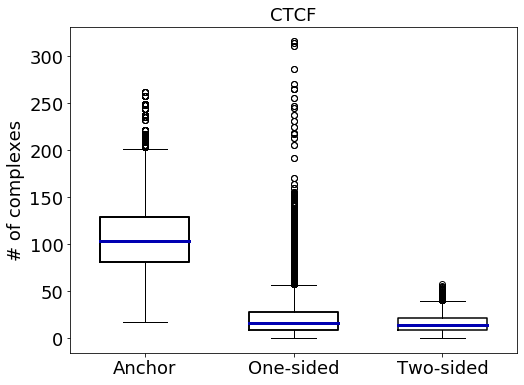

In [11]:
ctcf_anch = []
ctcf_oneside = []
ctcf_twoside = []
for x in list(ctcf.values()):
    for y in x:
        ctcf_anch.append(y[0])
        ctcf_oneside.append(y[2])
        ctcf_twoside.append(y[3])
plot_boxplot([ctcf_anch, ctcf_oneside, ctcf_twoside], ['Anchor', 'One-sided', 'Two-sided'], '#0000B2', 'CTCF', '# of complexes', '')

In [12]:
len(ctcf_twoside)

8777

/Users/kimm/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


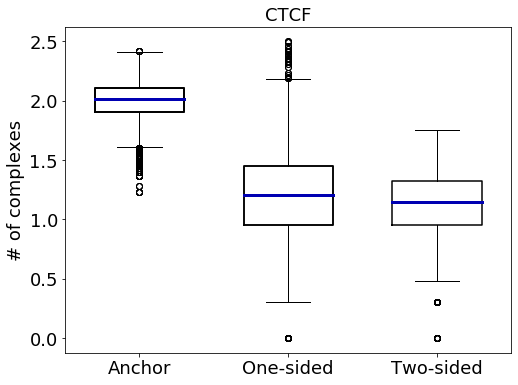

In [65]:
plot_boxplot([[np.log10(x) for x in ctcf_anch], [np.log10(x) for x in ctcf_oneside], [np.log10(x) for x in ctcf_twoside]], ['Anchor', 'One-sided', 'Two-sided'], '#0000B2', 'CTCF', '# of complexes', 'CTCF_complexes_boxplot')

In [78]:
median1=np.median(ctcf_anch)

In [79]:
median2=np.median(ctcf_oneside)

In [80]:
median3=np.median(ctcf_twoside)

In [81]:
stat23 = scipy.stats.mannwhitneyu(ctcf_oneside, ctcf_twoside)[0]
pval23 = scipy.stats.mannwhitneyu(ctcf_oneside, ctcf_twoside)[1]

In [82]:
stat12 = scipy.stats.mannwhitneyu(ctcf_anch, ctcf_oneside)[0]
pval12 = scipy.stats.mannwhitneyu(ctcf_anch, ctcf_oneside)[1]

In [83]:
stat13 = scipy.stats.mannwhitneyu(ctcf_anch, ctcf_twoside)[0]
pval13 = scipy.stats.mannwhitneyu(ctcf_anch, ctcf_twoside)[1]

In [84]:
stat23

32989750.0

In [85]:
pval23

2.7157707066799044e-61

/Users/kimm/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


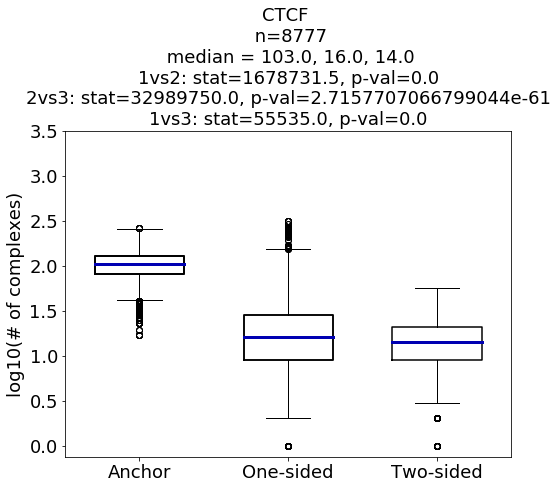

In [86]:
plot_boxplot_ymax([[np.log10(x) for x in ctcf_anch], [np.log10(x) for x in ctcf_oneside], [np.log10(x) for x in ctcf_twoside]], ['Anchor', 'One-sided', 'Two-sided'], '#0000B2', 'CTCF \n n='+str(len(ctcf_anch)) + "\n median = " + str(median1) + ", " + str(median2) + ", " + str(median3) +"\n" "1vs2: stat=" + str(stat12)+", p-val=" + str(pval12)+ "\n" +"2vs3: stat=" + str(stat23)+", p-val=" + str(pval23)+ "\n" +"1vs3: stat=" + str(stat13)+", p-val=" + str(pval13), 'log10(# of complexes)', 'CTCF_complexes_boxplot_ymax')

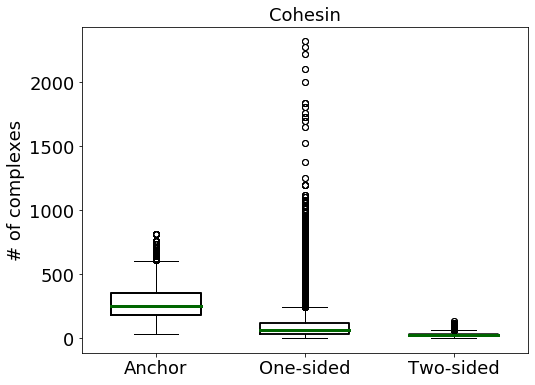

In [55]:
cohesin_anch = []
cohesin_oneside = []
cohesin_twoside = []
for x in list(cohesin.values()):
    for y in x:
        cohesin_anch.append(y[0])
        cohesin_oneside.append(y[2])
        cohesin_twoside.append(y[3])
plot_boxplot([cohesin_anch, cohesin_oneside, cohesin_twoside], ['Anchor', 'One-sided', 'Two-sided'], '#006600', 'Cohesin', '# of complexes', '')

In [51]:
np.log10(10)

1.0

In [56]:
median1=np.median(cohesin_anch)
median2=np.median(cohesin_oneside)
median3=np.median(cohesin_twoside)

In [57]:
stat12 = scipy.stats.mannwhitneyu(cohesin_anch, cohesin_oneside)[0]
pval12 = scipy.stats.mannwhitneyu(cohesin_anch, cohesin_oneside)[1]
stat23 = scipy.stats.mannwhitneyu(cohesin_oneside, cohesin_twoside)[0]
pval23 = scipy.stats.mannwhitneyu(cohesin_oneside, cohesin_twoside)[1]
stat13 = scipy.stats.mannwhitneyu(cohesin_anch, cohesin_twoside)[0]
pval13 = scipy.stats.mannwhitneyu(cohesin_anch, cohesin_twoside)[1]

/Users/kimm/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


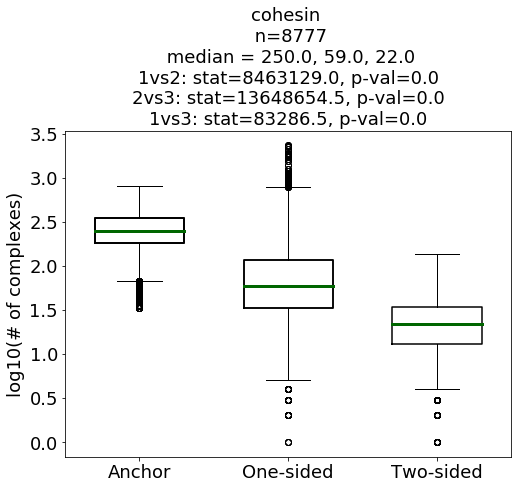

In [58]:
plot_boxplot([[np.log10(x) for x in cohesin_anch], [np.log10(x) for x in cohesin_oneside], [np.log10(x) for x in cohesin_twoside]], ['Anchor', 'One-sided', 'Two-sided'], '#006600', 'cohesin \n n='+str(len(cohesin_anch)) + "\n median = " + str(median1) + ", " + str(median2) + ", " + str(median3) +"\n" "1vs2: stat=" + str(stat12)+", p-val=" + str(pval12)+ "\n" +"2vs3: stat=" + str(stat23)+", p-val=" + str(pval23)+ "\n" +"1vs3: stat=" + str(stat13)+", p-val=" + str(pval13), 'log10(# of complexes)', 'cohesin_complexes_boxplot')

In [53]:
np.median(cohesin_anch)

250.0

In [54]:
np.median(cohesin_oneside)

59.0

In [55]:
np.median(cohesin_twoside)

22.0